In [1]:
#! /usr/bin/env python
# Compute psfres-mag and psfres-colour on deep fields


from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table,join
import h5py as h




In [2]:
#need a file with PSF residuals and ones with mags/fluxes/colours

#PSFres catalogue
prefix='psfex' #'psfex'
band='J'
psfresfile='PSFres_UVISTA_%s.fits' % (band)
#read in PSF res file - output from MEasurePSFres_deep.py
data = fitsio.read(psfresfile)

#data = fitsio.read('/global/homes/m/mjarvis/desdata/users/mjarvis/y3a1-v29/psf_y3a1-v29.fits')
print(data)
h = fitsio.read_header(psfresfile)
print(h)

"""band=data['band']
thisband="J"
data=data[np.where(band ==thisband)]
print(len(data))
#print(data[:100])
data = data[data['ra'].argsort()][:100000]
#print(data)
print(len(data))
"""

print(len(data['mag_aper']))
good = (data['psfex_T']!=-999)&(data['obs_T']!=-999)
data= data[good]
print(len(data['mag_aper']))
#mag=df['mag_aper'][good]
#
rastarcat = data['ra']
rastarcat[rastarcat > 180] -= 360
decstarcat = data['dec'] 

#read in photometry catalogue
import wget
cosmosdered='http://www.star.ucl.ac.uk/~whartley/run-fmof-dv02_extcorr.fits' #De-reddended 9-band cosmos.
#'wget -q --no-check-certificate %s'%(cosmosdered)

deepdata = fits.open(cosmosdered)
deepdata.info() 
print(deepdata.info)
deep=Table(deepdata[1].data)
#print(deep)
print(max(deep['ra']))
print(min(deep['ra']))
#cosmos=deep['ra']
cols = deepdata[1].columns
print(cols)

deepra=deep['ra']
deepdec=deep['dec']
#deepu=deep['bdf_mag'][:,0]
deepg=deep['bdf_mag_dered'][:,0]
deepg=deep['bdf_mag_dered'][:,1]
deepr=deep['bdf_mag_dered'][:,2]
deepi=deep['bdf_mag_dered'][:,3]
deepz=deep['bdf_mag_dered'][:,4]
deepy=deep['bdf_mag_dered'][:,5]
deepj=deep['bdf_mag_dered'][:,6]
deeph=deep['bdf_mag_dered'][:,7]
deepk=deep['bdf_mag_dered'][:,8]


[ (48,      1,  26920.6485832 ,   7168.6999566 ,  23.56662941,  2.58956218, False, -999., -999., -999., -999., -999., -999., 129,  149.94104984,  1.58964301, -999., -999., -999., -999., -999., -999., 129)
 (48,      2,  26179.94104317,   7167.85898698,  20.76789665,  2.87958455, False, -999., -999., -999., -999., -999., -999., 129,  149.97192254,  1.58961036, -999., -999., -999., -999., -999., -999., 129)
 (48,      3,  19364.13636384,   7175.16284126,  23.94672203,  3.06442761, False, -999., -999., -999., -999., -999., -999., 129,  150.25600702,  1.58991497, -999., -999., -999., -999., -999., -999., 129)
 ...,
 (16, 280996,  30539.66332695,  37055.32833666,  24.08070564,  3.42977428, False, -999., -999., -999., -999., -999., -999., 129,  149.78993854,  2.83483168, -999., -999., -999., -999., -999., -999., 129)
 (16, 280997,  24127.45926731,  37067.40725506,  24.77133751,  3.30172777, False, -999., -999., -999., -999., -999., -999., 129,  150.05742118,  2.83537933, -999., -999., -999.,

In [3]:
def compute_res(d):
    dt =  (d['obs_T']-d[prefix+'_T'])
    dtfrac = dt/d['obs_T']
    print('mean dt = ',np.mean(dt))
    return dtfrac, dt #,  de1, de2

In [4]:
#now need to match 

from astropy.coordinates import SkyCoord
from astropy import units as u

deepcat = SkyCoord(ra=deepra*u.degree, dec=deepdec*u.degree)  
catalog = SkyCoord(ra=rastarcat*u.degree, dec=decstarcat*u.degree)  
idx, d2d, d3d = catalog.match_to_catalog_sky(deepcat, nthneighbor=1) 

print(deepra[idx])

print(rastarcat)

      ra     
-------------
149.760884114
150.200511137
149.717448563
149.807642817
150.097451632
149.777257947
149.794299453
150.076393687
149.784491309
150.120002225
          ...
149.874969414
149.676707676
149.854917961
149.785349356
150.204475102
149.825862711
150.503336058
149.722788587
150.154794685
150.484414869
150.137430608
Length = 3563 rows
[ 149.75945695  150.20910831  149.71342192 ...,  150.15503866  150.48446972
  150.13744905]


3563
[0d00m09.8078s 0d00m33.2065s 0d00m21.1691s ..., 0d00m09.1575s 0d00m00.2015s
 0d00m00.073s]
[  9.8077545   33.20649147  21.16907001 ...,   9.15749596   0.20149182
   0.07299638]


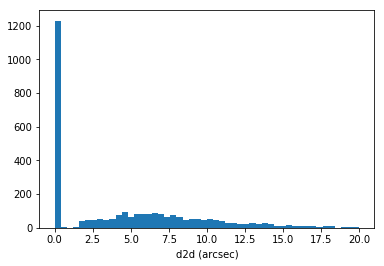

In [5]:
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50, range=(0, 20)) #, normed=1, alpha=0.75)
plt.xlabel('d2d (arcsec)')

3563
[0d00m09.8078s 0d00m33.2065s 0d00m21.1691s ..., 0d00m09.1575s 0d00m00.2015s
 0d00m00.073s]
[  9.8077545   33.20649147  21.16907001 ...,   9.15749596   0.20149182
   0.07299638]


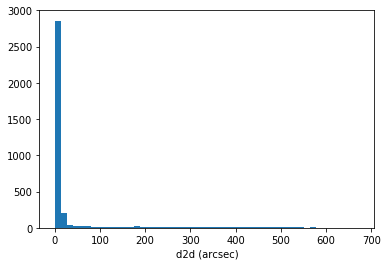

In [6]:
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50) #, normed=1, alpha=0.75)
plt.xlabel('d2d (arcsec)')

[0d00m09.8078s 0d00m33.2065s 0d00m21.1691s ..., 0d00m06.6633s 0d00m03.4519s
 0d00m09.1575s]
1282


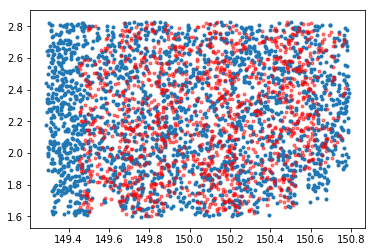

In [7]:
matchlim=2*u.arcsecond
print(d2d[d2d > matchlim])  
print(len(d2d[d2d < matchlim]))  


plt.scatter(rastarcat[np.where(d2d >matchlim)],decstarcat[np.where(d2d > matchlim)], marker='.')
plt.scatter(rastarcat[np.where(d2d < matchlim)],decstarcat[np.where(d2d < matchlim)], marker='.', color="red", alpha=0.5)

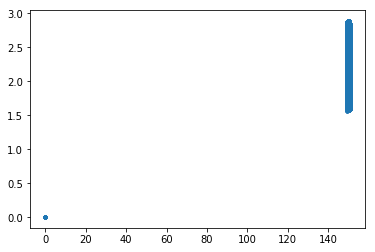

In [8]:
plt.scatter(deepra,deepdec, marker='.')

[0d00m09.8078s 0d00m33.2065s 0d00m21.1691s ..., 0d00m06.6633s 0d00m03.4519s
 0d00m09.1575s]
1282
      ra     
-------------
149.807642817
149.777257947
 149.83219821
149.683441534
 150.32126553
149.781413748
149.721360728
  149.5019444
150.235320327
149.811253409
          ...
150.119900702
149.815406856
150.563778356
 150.09589564
150.586918748
150.600169465
149.675997027
150.082568688
149.809762496
150.484414869
150.137430608
Length = 1282 rows
[ 149.80765422  149.77730174  149.83219425 ...,  149.80977356  150.48446972
  150.13744905]
149.435126896 150.779141742
149.289543131 150.790091919


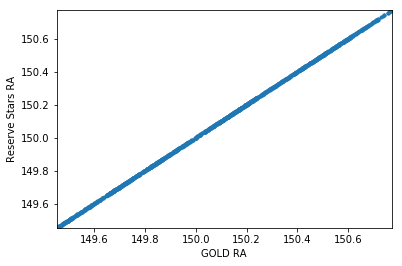

In [9]:
matchlim=2*u.arcsecond
print(d2d[d2d > matchlim])  
print(len(d2d[d2d < matchlim]))  
print(deepra[idx][np.where(d2d < matchlim)])
print(rastarcat[np.where(d2d < matchlim)])
#plt.scatter(goldra[idx], rastarcat, marker='.')
plt.scatter(deepra[idx][np.where(d2d < matchlim)],rastarcat[np.where(d2d < matchlim)], marker='.')
plt.xlabel('GOLD RA')
plt.ylabel('Reserve Stars RA')
plt.ticklabel_format(useOffset=False)
plt.xlim(min(deepra[idx][np.where(d2d < matchlim)]),max(deepra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(rastarcat[np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]) )
print(min(deepra[idx]),max(deepra[idx]) )
print(min(rastarcat),max(rastarcat) )

149.435126896 150.779141742
149.289543131 150.790091919


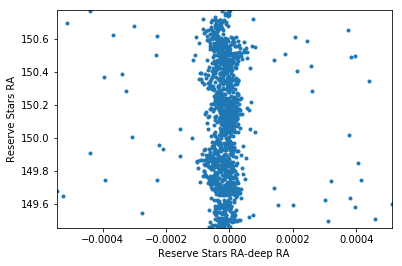

In [10]:
plt.scatter(rastarcat[np.where(d2d < matchlim)]-deepra[idx][np.where(d2d < matchlim)],rastarcat[np.where(d2d < matchlim)], marker='.')
plt.xlabel('Reserve Stars RA-deep RA')
plt.ylabel('Reserve Stars RA')
plt.ticklabel_format(useOffset=False)
#plt.xlim(min(goldra[idx][np.where(d2d < matchlim)]),max(goldra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(rastarcat[np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]) )
plt.xlim(min(rastarcat[np.where(d2d < matchlim)]-deepra[idx][np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]-deepra[idx][np.where(d2d < matchlim)]) )
print(min(deepra[idx]),max(deepra[idx]) )
print(min(rastarcat),max(rastarcat) )

'print(idx, d2d, d3d)\nprint("length of star cat: ", len(rastarcat))\nprint("length of gold cat: ", len(ra))\nprint("length of matched indices: ", len(idx))\nprint(rastarcat[idx])\nprint(ra)\nprint(data[\'obs_e1\'])'

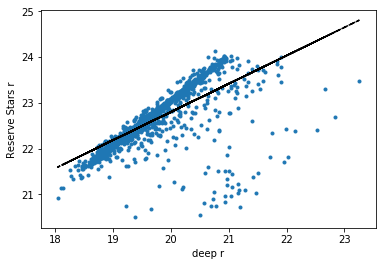

In [22]:
fit = np.polyfit(deepj[idx][np.where(d2d < matchlim)], data['mag_aper'][np.where(d2d < matchlim)], 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.plot(deepj[idx][np.where(d2d < matchlim)], fit_fn(deepj[idx][np.where(d2d < matchlim)]), '--k')
plt.scatter(deepj[idx][np.where(d2d < matchlim)], data['mag_aper'][np.where(d2d < matchlim)], marker='.')
plt.xlabel('deep r')
plt.ylabel('Reserve Stars r')


"""print(idx, d2d, d3d)
print("length of star cat: ", len(rastarcat))
print("length of gold cat: ", len(ra))
print("length of matched indices: ", len(idx))
print(rastarcat[idx])
print(ra)
print(data['obs_e1'])"""

In [12]:
#tolerance=0.2

#if (deepr[idx][np.where(d2d < matchlim)], fit_fn(deepr[idx][np.where(d2d < matchlim)])

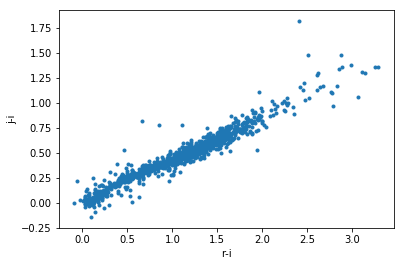

In [24]:
plt.scatter(deepr[idx][np.where(d2d < matchlim)]-deepi[idx][np.where(d2d < matchlim)], deepi[idx][np.where(d2d < matchlim)]-deepz[idx][np.where(d2d < matchlim)], marker='.')
plt.xlabel('r-i')
plt.ylabel('j-i')

In [25]:
fracsizeres, sizeres =compute_res(data[np.where(d2d < matchlim)])

mean dt =  -0.00189301035607


In [15]:
#print(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)])
#print(goldi[idx][np.where(d2d < matchlim)]-goldz[idx][np.where(d2d < matchlim)])
#print(min(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)]))
#print(min(goldi[idx][np.where(d2d < matchlim)]-goldz[idx][np.where(d2d < matchlim)]))

In [34]:
#want psf vs colour:  #r-i with r or i band psfs and i-z for x-psf
def bin_by_col(m, dT, dTfrac, min_mused,band):
    min_mag = min(m)
    max_mag = max(m)
     
    mag_bins = np.linspace(min_mag, max_mag,51)
    print('col_bins = ',mag_bins)

    index = np.digitize(m, mag_bins)
    #print('len(index) = ',len(index))
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_dT = ',bin_dT)
    bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_dTfrac = ',bin_dTfrac)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_dT_err = ',bin_dT_err)
    bin_dTfrac_err = [ np.sqrt(dTfrac[index == i].var() / len(dTfrac[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_dTfrac_err = ',bin_dTfrac_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_dT[i-1] = 0.
            bin_dTfrac[i-1] = 0.
            bin_dT_err[i-1] = 0.
            bin_dTfrac_err[i-1] = 0.


    fig, axes = plt.subplots(2,1, sharex=True)
    
    ax = axes[0]
    #ax.set_ylim(-0.002,0.002)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='darkturquoise', fmt='o')
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$', fontsize='x-large')

    ax = axes[1]
    #ax.set_ylim(-0.002,0.002)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, color='darkturquoise', fmt='o')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$', fontsize='x-large')
    ax.set_xlabel('%s-i'%band, fontsize='x-large')

    fig.set_size_inches(7.0,12.0)
    plt.tight_layout()
    plt.savefig('dpsf_colour.pdf')
    plt.show()

col_bins =  [-0.08794796 -0.02047096  0.04700603  0.11448302  0.18196002  0.24943701
  0.316914    0.384391    0.45186799  0.51934498  0.58682198  0.65429897
  0.72177596  0.78925296  0.85672995  0.92420695  0.99168394  1.05916093
  1.12663793  1.19411492  1.26159191  1.32906891  1.3965459   1.46402289
  1.53149989  1.59897688  1.66645387  1.73393087  1.80140786  1.86888485
  1.93636185  2.00383884  2.07131583  2.13879283  2.20626982  2.27374681
  2.34122381  2.4087008   2.47617779  2.54365479  2.61113178  2.67860877
  2.74608577  2.81356276  2.88103975  2.94851675  3.01599374  3.08347074
  3.15094773  3.21842472  3.28590172]


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Degrees of freedom <= 0 for slice
  app.launch_new_instance()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice


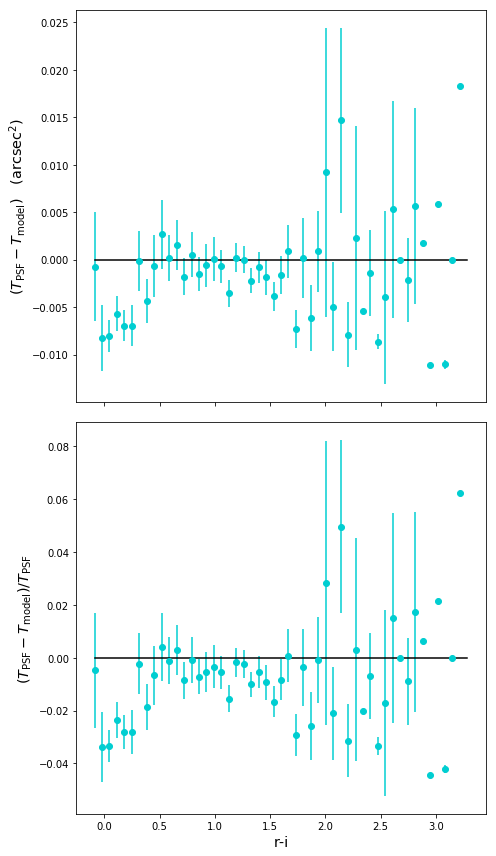

In [35]:
bin_by_col(deepr[idx][np.where(d2d < matchlim)]-deepi[idx][np.where(d2d < matchlim)], sizeres, fracsizeres, 15,"r")

col_bins =  [-3.62607212 -3.52739596 -3.4287198  -3.33004363 -3.23136747 -3.13269131
 -3.03401515 -2.93533898 -2.83666282 -2.73798666 -2.63931049 -2.54063433
 -2.44195817 -2.34328201 -2.24460584 -2.14592968 -2.04725352 -1.94857736
 -1.84990119 -1.75122503 -1.65254887 -1.5538727  -1.45519654 -1.35652038
 -1.25784422 -1.15916805 -1.06049189 -0.96181573 -0.86313957 -0.7644634
 -0.66578724 -0.56711108 -0.46843491 -0.36975875 -0.27108259 -0.17240643
 -0.07373026  0.0249459   0.12362206  0.22229822  0.32097439  0.41965055
  0.51832671  0.61700288  0.71567904  0.8143552   0.91303136  1.01170753
  1.11038369  1.20905985  1.30773601]


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Degrees of freedom <= 0 for slice
  app.launch_new_instance()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice


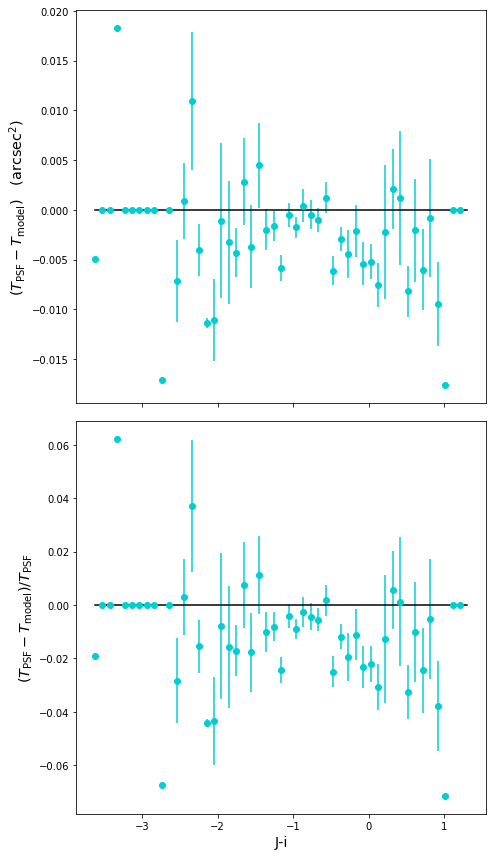

In [36]:
bin_by_col(deepj[idx][np.where(d2d < matchlim)]-deepi[idx][np.where(d2d < matchlim)], sizeres, fracsizeres, 15,"J")

col_bins =  [-4.29450476 -4.16600626 -4.03750777 -3.90900928 -3.78051079 -3.65201229
 -3.5235138  -3.39501531 -3.26651682 -3.13801832 -3.00951983 -2.88102134
 -2.75252285 -2.62402436 -2.49552586 -2.36702737 -2.23852888 -2.11003039
 -1.98153189 -1.8530334  -1.72453491 -1.59603642 -1.46753792 -1.33903943
 -1.21054094 -1.08204245 -0.95354396 -0.82504546 -0.69654697 -0.56804848
 -0.43954999 -0.31105149 -0.182553   -0.05405451  0.07444398  0.20294248
  0.33144097  0.45993946  0.58843795  0.71693644  0.84543494  0.97393343
  1.10243192  1.23093041  1.35942891  1.4879274   1.61642589  1.74492438
  1.87342288  2.00192137  2.13041986]


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Degrees of freedom <= 0 for slice
  app.launch_new_instance()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice


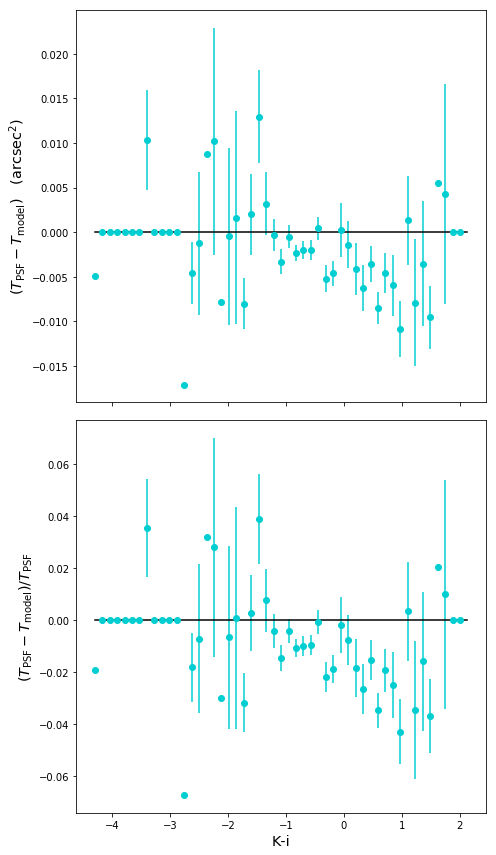

In [37]:
bin_by_col(deepk[idx][np.where(d2d < matchlim)]-deepi[idx][np.where(d2d < matchlim)], sizeres, fracsizeres, 15,"K")

col_bins =  [-4.07493563 -3.96284776 -3.8507599  -3.73867203 -3.62658417 -3.5144963
 -3.40240844 -3.29032057 -3.17823271 -3.06614484 -2.95405698 -2.84196911
 -2.72988125 -2.61779338 -2.50570552 -2.39361765 -2.28152979 -2.16944192
 -2.05735406 -1.94526619 -1.83317833 -1.72109046 -1.6090026  -1.49691473
 -1.38482687 -1.272739   -1.16065114 -1.04856327 -0.93647541 -0.82438754
 -0.71229968 -0.60021181 -0.48812395 -0.37603608 -0.26394822 -0.15186036
 -0.03977249  0.07231537  0.18440324  0.2964911   0.40857897  0.52066683
  0.6327547   0.74484256  0.85693043  0.96901829  1.08110616  1.19319402
  1.30528189  1.41736975  1.52945762]


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Degrees of freedom <= 0 for slice
  app.launch_new_instance()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice


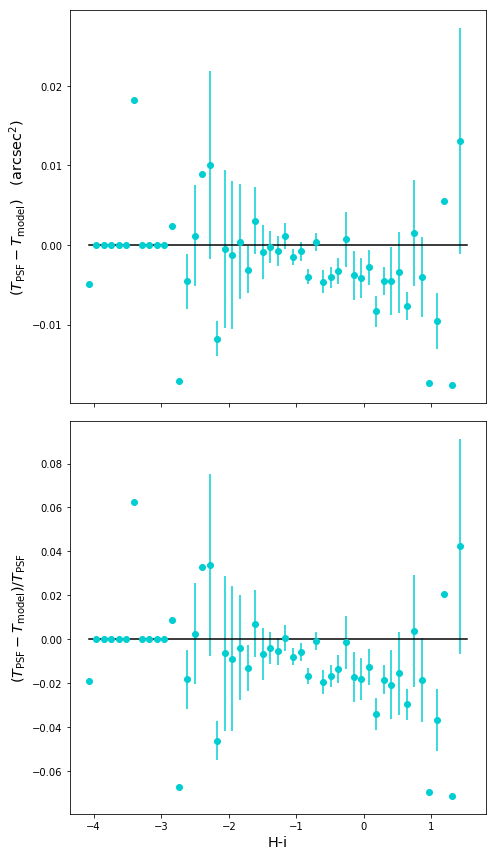

In [38]:
bin_by_col(deeph[idx][np.where(d2d < matchlim)]-deepi[idx][np.where(d2d < matchlim)], sizeres, fracsizeres, 15,"H")

col_bins =  [ -0.93375278  -0.66280006  -0.39184734  -0.12089461   0.15005811
   0.42101083   0.69196355   0.96291627   1.23386899   1.50482172
   1.77577444   2.04672716   2.31767988   2.5886326    2.85958533
   3.13053805   3.40149077   3.67244349   3.94339621   4.21434893
   4.48530166   4.75625438   5.0272071    5.29815982   5.56911254
   5.84006527   6.11101799   6.38197071   6.65292343   6.92387615
   7.19482888   7.4657816    7.73673432   8.00768704   8.27863976
   8.54959248   8.82054521   9.09149793   9.36245065   9.63340337
   9.90435609  10.17530882  10.44626154  10.71721426  10.98816698
  11.2591197   11.53007242  11.80102515  12.07197787  12.34293059
  12.61388331]


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Degrees of freedom <= 0 for slice
  app.launch_new_instance()
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice


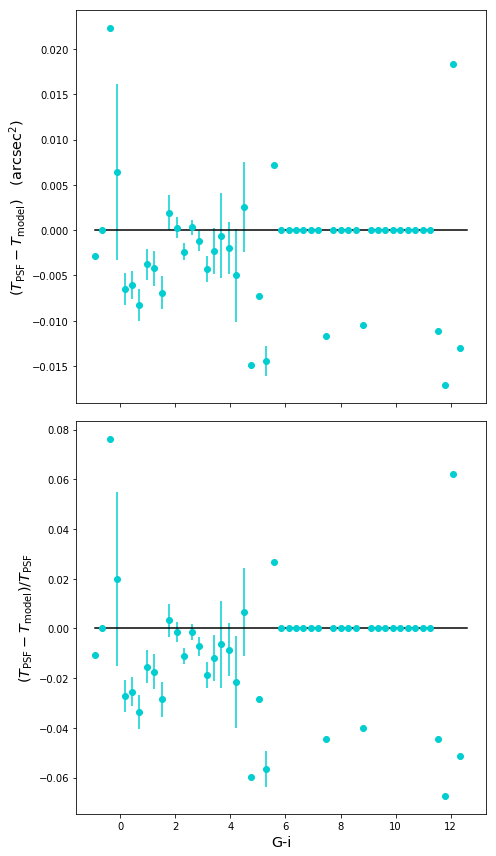

In [39]:
bin_by_col(deepg[idx][np.where(d2d < matchlim)]-deepi[idx][np.where(d2d < matchlim)], sizeres, fracsizeres, 15,"G")